In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salaryes = pd.read_csv('Salary-Data.csv')
salaryes

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000
369,43,Male,Master's,Director of Operations,19.0,170000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000


Допустим хотим зарплату(Salary) в зависимости от стажа(Years of Experience)

Удалим все ненужные строки

In [17]:
salaryes = salaryes.drop(columns=['Age', 'Gender', 'Education Level', 'Job Title'])

In [24]:
sortSalary = salaryes.sort_values(by=["Years of Experience", "Salary"])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sortSalary['Years of Experience'], sortSalary['Salary'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

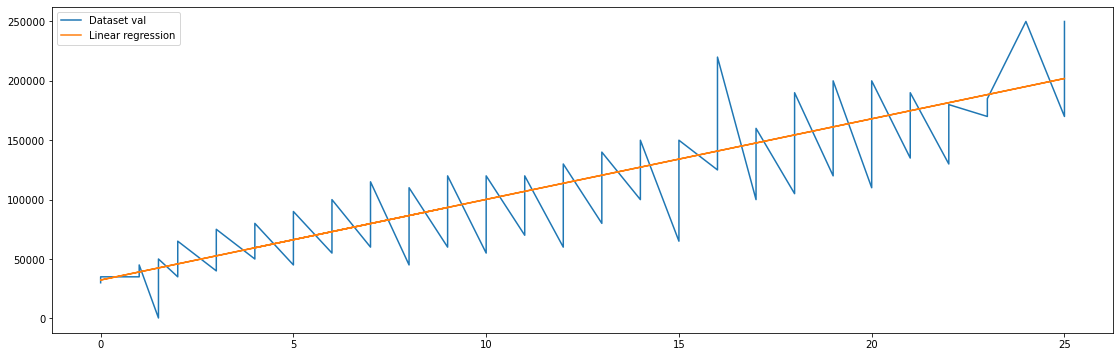

In [27]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortSalary['Years of Experience'], sortSalary['Salary'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
#ax.plot(X_test, model.predict(X_test), label='Prediction')
ax.legend()
plt.show()

Посчитаем метрику MAE

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 11854.875271801238
MSE = 263069914.52519003


Ошибки такие большие т.к датасет достаточно неравномерный(зарплаты берутся по разным профессиям) и разница между ними большая...